## 1. Image Data Processing

In [ ]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt
# for in line plost in notebook
%matplotlib inline

In [ ]:
import os
if os.path.exists('/content/imageProcessing') == False:
  !git clone https://github.com/amrik220/imageProcessing

In [ ]:
# load an image
# img = plt.imread('./images/0.jpg')
img = plt.imread('/content/imageProcessing/classify_as_emergency_vehicle/images/0.jpg')

In [ ]:
# print image
img

array([[[115, 134, 141],
        [116, 135, 142],
        [116, 135, 142],
        ...,
        [ 70,  81,  87],
        [ 74,  85,  91],
        [ 82,  93,  99]],

       [[115, 134, 141],
        [116, 135, 142],
        [116, 135, 142],
        ...,
        [ 82,  93,  99],
        [ 82,  93,  99],
        [ 83,  94, 100]],

       [[115, 134, 141],
        [116, 135, 142],
        [116, 135, 142],
        ...,
        [ 77,  88,  94],
        [ 75,  86,  92],
        [ 76,  87,  93]],

       ...,

       [[ 39,  39,  37],
        [ 36,  36,  34],
        [ 35,  35,  33],
        ...,
        [ 42,  41,  39],
        [ 45,  44,  42],
        [ 43,  42,  40]],

       [[ 38,  38,  36],
        [ 37,  37,  35],
        [ 36,  36,  34],
        ...,
        [ 45,  44,  42],
        [ 43,  42,  40],
        [ 34,  33,  31]],

       [[ 33,  33,  31],
        [ 33,  33,  31],
        [ 32,  32,  30],
        ...,
        [ 43,  42,  40],
        [ 34,  33,  31],
        [ 20,  19,  17]]

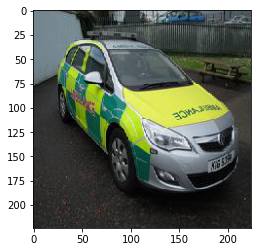

In [ ]:
# plot image
plt.imshow(img)

In [ ]:
# display image shape
img.shape

(224, 224, 3)

In [ ]:
# display a pixel
img[0, 0]

array([115, 134, 141], dtype=uint8)

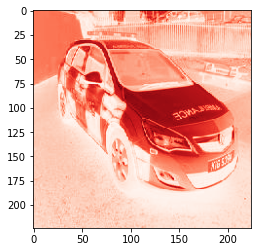

In [ ]:
# show red channel
plt.imshow(img[:, :, 0], cmap='Reds') 

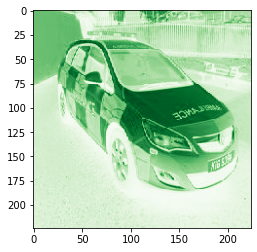

In [ ]:
# show green channel
plt.imshow(img[:, :, 1], cmap='Greens')

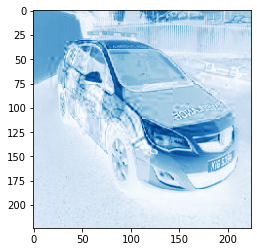

In [ ]:
# show blue channel
plt.imshow(img[:, :, 2], cmap='Blues')

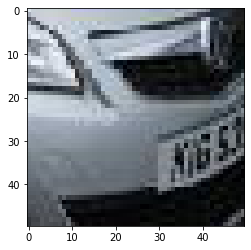

In [ ]:
# extract part of image
patch = img[125:175 , 150:200]


# plot part of image
plt.imshow(patch)

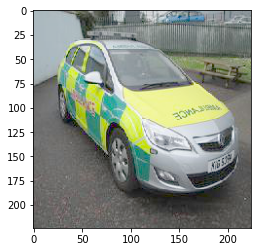

In [ ]:
# load library
from skimage.exposure import adjust_gamma

# increase brightness
plt.imshow(adjust_gamma(img, 0.5))

## 2. Data exploration

In [ ]:
from glob import glob

In [ ]:
images = glob('/content/imageProcessing/classify_as_emergency_vehicle/images/*.jpg')

In [ ]:
images

['/content/imageProcessing/classify_as_emergency_vehicle/images/1080.jpg',
 '/content/imageProcessing/classify_as_emergency_vehicle/images/45.jpg',
 '/content/imageProcessing/classify_as_emergency_vehicle/images/690.jpg',
 '/content/imageProcessing/classify_as_emergency_vehicle/images/1628.jpg',
 '/content/imageProcessing/classify_as_emergency_vehicle/images/1629.jpg',
 '/content/imageProcessing/classify_as_emergency_vehicle/images/368.jpg',
 '/content/imageProcessing/classify_as_emergency_vehicle/images/72.jpg',
 '/content/imageProcessing/classify_as_emergency_vehicle/images/1277.jpg',
 '/content/imageProcessing/classify_as_emergency_vehicle/images/2016.jpg',
 '/content/imageProcessing/classify_as_emergency_vehicle/images/363.jpg',
 '/content/imageProcessing/classify_as_emergency_vehicle/images/1982.jpg',
 '/content/imageProcessing/classify_as_emergency_vehicle/images/462.jpg',
 '/content/imageProcessing/classify_as_emergency_vehicle/images/694.jpg',
 '/content/imageProcessing/classif

In [ ]:
# to reproduce results
seed = 220
rng = np.random.RandomState(seed)

In [ ]:
img_name = rng.choice(images)
img_name

'/content/imageProcessing/classify_as_emergency_vehicle/images/1396.jpg'

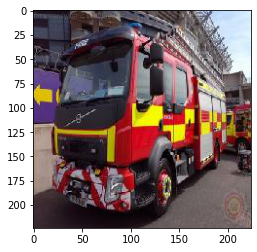

In [ ]:
img_name = rng.choice(images)

img = plt.imread(img_name)

plt.imshow(img)

In [ ]:
import pandas as pd
# Display output of all code lines in Jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
data = pd.read_csv('/content/imageProcessing/classify_as_emergency_vehicle/emergency_class_labels.csv')
data.head()
data.shape

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


(2352, 2)

In [ ]:
# check class balance
data.emergency_or_not.value_counts()
data.emergency_or_not.value_counts()[1]/data.emergency_or_not.value_counts()[0]*100

0    1361
1     991
Name: emergency_or_not, dtype: int64

72.81410727406319

### Select a row at random and load the corresponding image
#### Print class of the vehicle

It is an emergency vehicle


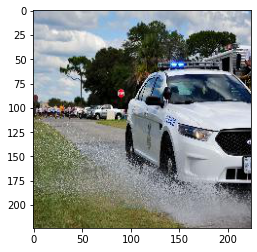

In [ ]:
# Select a row at random 
row_index = rng.choice(data.index)

# Get the image name
img_name = data.iloc[row_index]['image_names']

# Load and plot the image
img = plt.imread('/content/imageProcessing/classify_as_emergency_vehicle/images/' + img_name)
plt.imshow(img)

# Print the corresponding class lable of the image
target = data.iloc[row_index]['emergency_or_not']
if target == 1:
    print('It is an emergency vehicle')
else:
    print('It is NOT an emergency vehicle')

## 3. Load and preprocess data

In [ ]:
x = []

# Load all images
for img_name in data.image_names:
    # read the image from location
    img = plt.imread('/content/imageProcessing/classify_as_emergency_vehicle/images/' + img_name)
    # collate the images
    x.append(img)
    
# convert this python list to a single numpy array
x = np.array(x)

In [ ]:
x.shape

(2352, 224, 224, 3)

In [ ]:
y = data.emergency_or_not.values

In [ ]:
y.shape

(2352,)

In [ ]:
from keras.utils import to_categorical

y = to_categorical(y)
y.shape

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

(2352, 2)

In [ ]:
x.shape
x[0][0:223][0:223][0:3]

(2352, 224, 224, 3)

array([[[115, 134, 141],
        [116, 135, 142],
        [116, 135, 142],
        ...,
        [ 70,  81,  87],
        [ 74,  85,  91],
        [ 82,  93,  99]],

       [[115, 134, 141],
        [116, 135, 142],
        [116, 135, 142],
        ...,
        [ 82,  93,  99],
        [ 82,  93,  99],
        [ 83,  94, 100]],

       [[115, 134, 141],
        [116, 135, 142],
        [116, 135, 142],
        ...,
        [ 77,  88,  94],
        [ 75,  86,  92],
        [ 76,  87,  93]]], dtype=uint8)

In [ ]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
x.min(), x.max()

(0, 255)

In [ ]:
from keras.applications.vgg16 import preprocess_input



In [ ]:
x = preprocess_input(x, mode="tf")
# import keras
# keras.__version__
# !pip install Keras==2.3.1
# !pip install TensorFlow==1.14

In [ ]:
x.min(), x.max()

(-1.0, 1.0)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.3, random_state=42)

## 4. Repurpose a pretrained model
1. Load weights of pre-trained model
2. Finetune model for the current problem
3. Validate if it works fine, iterate again if it does not


[About ImageNet](http://www.image-net.org/about-overview)

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
base_model = VGG16(weights='imagenet')

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
from skimage.transform import resize

(224, 224, 3)

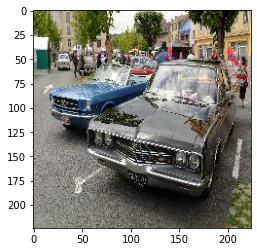

In [ ]:
new_img = resize(img, (224, 224, 3))
plt.imshow(new_img)
new_img.shape

In [ ]:
base_model = VGG16(weights='imagenet', input_shape=(224, 224, 3), include_top=False)

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

1. Extract features
2. Reshape the data
3. Rescale features
4. Create top model
5. Train the model

In [ ]:
base_model_pred = base_model.predict(x_train)
base_model_pred_valid = base_model.predict(x_valid)

In [ ]:
base_model_pred.shape

(1646, 7, 7, 512)

In [ ]:
base_model_pred = base_model_pred.reshape(1646, 7*7*512)

In [ ]:
base_model_pred_valid.shape

(706, 7, 7, 512)

In [ ]:
base_model_pred_valid = base_model_pred_valid.reshape(706, 7*7*512)

In [ ]:
base_model_pred.max()

11.343674

In [ ]:
max_val = base_model_pred.max()

base_model_pred = base_model_pred / max_val
base_model_pred_valid = base_model_pred_valid / max_val

In [ ]:
base_model_pred.min(), base_model_pred.max()

(0.0, 1.0)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, InputLayer

In [ ]:
model = Sequential()
model.add(InputLayer((7*7*512, )))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [ ]:
model.compile(optimizer='sgd', metrics=['accuracy'], loss='categorical_crossentropy')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2050      
Total params: 25,693,186
Trainable params: 25,693,186
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(base_model_pred, y_train, epochs=15, validation_data=(base_model_pred_valid, y_valid))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1646 samples, validate on 706 samples
Epoch 1/15
1646/1646 [==============================] - 12s 8ms/step - loss: 0.6411 - acc: 0.6039 - val_loss: 0.6131 - val_acc: 0.6076
Epoch 2/15
1646/1646 [==============================] - 12s 7ms/step - loss: 0.5612 - acc: 0.7570 - val_loss: 0.5420 - val_acc: 0.8045
Epoch 3/15
1646/1646 [==============================] - 12s 7ms/step - loss: 0.4983 - acc: 0.8305 - val_loss: 0.4943 - val_acc: 0.7975
Epoch 4/15
1646/1646 [==============================] - 12s 7ms/step - loss: 0.4500 - acc: 0.8396 - val_loss: 0.4560 - val_acc: 0.8116
Epoch 5/15
1646/1646 [==============================] - 12s 7ms/step - loss: 0.4117 - acc: 0.8536 - val_loss: 0.4217 - val_acc: 0.8371
Epoch 6/15
1646/1646 [==============================] - 12s 7ms/step - loss: 0.3839 - acc: 0.8657 - val_loss: 0.3959 - val_acc: 0.8513
Epoch 7/15
1646/1646 [===========================

In [ ]:
predictions = model.predict_classes(base_model_pred_valid)
predictions

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,

In [ ]:
prediction_probabilities = model.predict(base_model_pred_valid)
prediction_probabilities

array([[0.9636593 , 0.03634066],
       [0.1158691 , 0.88413095],
       [0.97972775, 0.0202723 ],
       ...,
       [0.05745336, 0.94254667],
       [0.8205008 , 0.17949925],
       [0.81072444, 0.1892755 ]], dtype=float32)

There is 3 % chance that it is an emergency vehicle
whereas actual class is 0


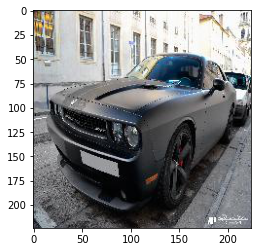

In [ ]:
# pull out original images from the data which correspond to the validation data
_, valid_images, _, _ = train_test_split(data.image_names.values, y, test_size=0.3, random_state=42)

# get a random image from validation data
img_name = rng.choice(valid_images)

# get the corresponding probability and actual class
prob = (prediction_probabilities[:, 1] * 100).astype(int)[np.where(valid_images == img_name)[0][0]]
actual_class = data.loc[data.image_names == img_name, 'emergency_or_not'].values[0]

# read the image
img = plt.imread('/content/imageProcessing/classify_as_emergency_vehicle/images/' + img_name)

# print probability and actual class
print('There is', prob, '% chance that it is an emergency vehicle')
print('whereas actual class is', actual_class)

# plot the image
plt.imshow(img)